In [1]:
# segmentation - k-means then describe then 
# cohorts?
#predict ltv based on 1st purchase 
#based on pLTV model identify important features and analyze them
#analyze based on ltv


# dataset contains only 1st booking for each customer. Customers are unique as well

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from pycaret.clustering  import *

In [3]:
initial_dataframe=pd.read_csv('fe_4.csv')

In [4]:
initial_dataframe.dropna(inplace=True)

In [6]:
initial_dataframe

,Unnamed: 0,CUSTOMER_ID,ACQ_BOOKEDDATE,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE
0,0,1,2018-11-22,55.750443,252.502492,13,1,0,1,16,0
1,1,2,2018-10-25,202.205070,5315.664345,41,0,0,2,0,0
2,2,3,2018-09-12,132.692400,2574.514393,84,0,0,0,4,1
3,3,4,2018-09-17,636.734275,313.337171,79,2,0,4,8,0
4,4,5,2018-11-01,104.654210,1511.881143,34,0,0,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...
109577,109577,109578,2018-11-22,732.245531,13876.289411,13,0,1,2,5,1
109578,109578,109579,2018-10-23,184.474761,332.290163,43,2,0,2,12,1
109579,109579,109580,2018-10-03,15.205975,3407.352069,63,1,0,3,16,0
109580,109580,109581,2018-10-02,1079.656930,6471.776885,64,1,1,4,17,0


In [7]:
initial_dataframe['ACQ_BOOKEDDATE'] = pd.to_datetime(initial_dataframe['ACQ_BOOKEDDATE'])

In [8]:
initial_dataframe['ACQ_BOOKEDDATE_MONTH_WEEK'] = initial_dataframe['ACQ_BOOKEDDATE'].dt.week
initial_dataframe

,Unnamed: 0,CUSTOMER_ID,ACQ_BOOKEDDATE,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE,ACQ_BOOKEDDATE_MONTH_WEEK
0,0,1,2018-11-22,55.750443,252.502492,13,1,0,1,16,0,47
1,1,2,2018-10-25,202.205070,5315.664345,41,0,0,2,0,0,43
2,2,3,2018-09-12,132.692400,2574.514393,84,0,0,0,4,1,37
3,3,4,2018-09-17,636.734275,313.337171,79,2,0,4,8,0,38
4,4,5,2018-11-01,104.654210,1511.881143,34,0,0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...
109577,109577,109578,2018-11-22,732.245531,13876.289411,13,0,1,2,5,1,47
109578,109578,109579,2018-10-23,184.474761,332.290163,43,2,0,2,12,1,43
109579,109579,109580,2018-10-03,15.205975,3407.352069,63,1,0,3,16,0,40
109580,109580,109581,2018-10-02,1079.656930,6471.776885,64,1,1,4,17,0,40


In [9]:
initial_dataframe.set_index('CUSTOMER_ID')

,Unnamed: 0,ACQ_BOOKEDDATE,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE,ACQ_BOOKEDDATE_MONTH_WEEK
CUSTOMER_ID,,,,,,,,,,,
1,0,2018-11-22,55.750443,252.502492,13,1,0,1,16,0,47
2,1,2018-10-25,202.205070,5315.664345,41,0,0,2,0,0,43
3,2,2018-09-12,132.692400,2574.514393,84,0,0,0,4,1,37
4,3,2018-09-17,636.734275,313.337171,79,2,0,4,8,0,38
5,4,2018-11-01,104.654210,1511.881143,34,0,0,2,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...
109578,109577,2018-11-22,732.245531,13876.289411,13,0,1,2,5,1,47
109579,109578,2018-10-23,184.474761,332.290163,43,2,0,2,12,1,43
109580,109579,2018-10-03,15.205975,3407.352069,63,1,0,3,16,0,40


In [10]:
initial_dataframe.drop(['Unnamed: 0','ACQ_BOOKEDDATE'],axis=1,inplace=True)

In [11]:
initial_dataframe['score']=initial_dataframe['ACQ_TRIP_TYPE_encoded']+initial_dataframe['ACQ_LENGTH_OF_STAY_CATEGORY_encoded']+initial_dataframe['ACQ_BOOKING_LEADTIME_encoded']+\
initial_dataframe['ACQ_BOOKING_PLATFORM_MOBILE']

In [13]:
initial_dataframe

,CUSTOMER_ID,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE,ACQ_BOOKEDDATE_MONTH_WEEK,score
0,1,55.750443,252.502492,13,1,0,1,16,0,47,2
1,2,202.205070,5315.664345,41,0,0,2,0,0,43,2
2,3,132.692400,2574.514393,84,0,0,0,4,1,37,1
3,4,636.734275,313.337171,79,2,0,4,8,0,38,6
4,5,104.654210,1511.881143,34,0,0,2,4,1,44,3
...,...,...,...,...,...,...,...,...,...,...,...
109577,109578,732.245531,13876.289411,13,0,1,2,5,1,47,4
109578,109579,184.474761,332.290163,43,2,0,2,12,1,43,5
109579,109580,15.205975,3407.352069,63,1,0,3,16,0,40,4
109580,109581,1079.656930,6471.776885,64,1,1,4,17,0,40,6


In [12]:
#Utilizing StandardScaler to help model converge
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data = pd.DataFrame(scale.fit_transform(initial_dataframe.drop('CUSTOMER_ID',axis=1)),columns = initial_dataframe.drop('CUSTOMER_ID',axis=1).columns)

In [14]:
data

,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE,ACQ_BOOKEDDATE_MONTH_WEEK,score
0,-0.580406,-0.506579,-1.339611,0.086244,-0.607043,-0.903278,0.698858,-0.835939,1.336977,-1.037168
1,-0.398084,-0.183117,-0.279969,-1.258209,-0.607043,-0.208005,-1.611702,-0.835939,0.281174,-1.037168
2,-0.484621,-0.358236,1.347338,-1.258209,-0.607043,-1.598551,-1.034062,1.196260,-1.302530,-1.529567
3,0.142863,-0.502693,1.158116,1.430697,-0.607043,1.182540,-0.456422,-0.835939,-1.038580,0.932426
4,-0.519526,-0.426123,-0.544880,-1.258209,-0.607043,-0.208005,-1.034062,1.196260,0.545125,-0.544770
...,...,...,...,...,...,...,...,...,...,...
105891,0.261765,0.363783,-1.339611,-1.258209,0.712647,-0.208005,-0.889652,1.196260,1.336977,-0.052371
105892,-0.420157,-0.501482,-0.204280,1.430697,-0.607043,-0.208005,0.121218,1.196260,0.281174,0.440028
105893,-0.630880,-0.305030,0.552607,0.086244,-0.607043,0.487267,0.698858,-0.835939,-0.510678,-0.052371
105894,0.694259,-0.109258,0.590451,0.086244,0.712647,1.182540,0.843268,-0.835939,-0.510678,0.932426


In [15]:
X= data[['score','ACQ_BOOKEDDATE_MONTH_WEEK','ACQ_BEDVALUE']]

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(X)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,data[['LIFETIME_BEDVALUE']]],axis=1)

In [17]:
finaldf

,pc1,pc2,LIFETIME_BEDVALUE
0,-1.358810,1.145000,-0.506579
1,-1.051588,0.143642,-0.183117
2,-1.185276,-1.453133,-0.358236
3,0.931684,-0.940059,-0.502693
4,-0.835088,0.407133,-0.426123
...,...,...,...
105891,-0.085371,1.357334,0.363783
105892,-0.029653,0.221563,-0.501482
105893,-0.385081,-0.621843,-0.305030
105894,1.222111,-0.319110,-0.109258


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


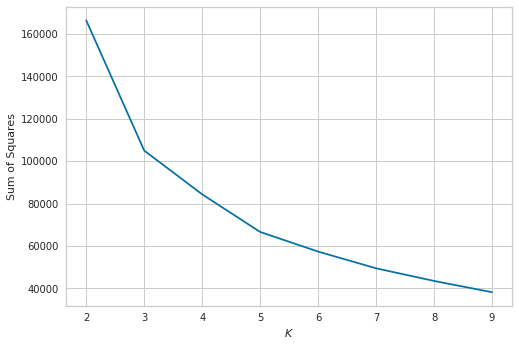

In [18]:
# The Elbow Method with the Sum of Squared Errors (SSE)

from sklearn.cluster import KMeans
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,10))
X = finaldf[['pc1','pc2']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for n_cluster in [3]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
       X)
    
    silhouette_avg = silhouette_score(
        X, 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

In [ ]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = kmeans
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()

In [20]:
kmeans = KMeans(n_clusters=3).fit(X)

In [22]:
data['pc1'] =finaldf['pc1']
data['pc2'] = finaldf['pc2']
data['Cluster'] = kmeans.labels_
data

,ACQ_BEDVALUE,LIFETIME_BEDVALUE,recency,ACQ_TRIP_TYPE_encoded,ACQ_LENGTH_OF_STAY_CATEGORY_encoded,ACQ_BOOKING_LEADTIME_encoded,GROUP_encoded,ACQ_BOOKING_PLATFORM_MOBILE,ACQ_BOOKEDDATE_MONTH_WEEK,score,pc1,pc2,Cluster
0,55.750443,252.502492,13.0,1.0,0.0,1.0,16.0,0.0,47.0,2.0,-1.358810,1.145000,0
1,202.205070,5315.664345,41.0,0.0,0.0,2.0,0.0,0.0,43.0,2.0,-1.051588,0.143642,0
2,132.692400,2574.514393,84.0,0.0,0.0,0.0,4.0,1.0,37.0,1.0,-1.185276,-1.453133,1
3,636.734275,313.337171,79.0,2.0,0.0,4.0,8.0,0.0,38.0,6.0,0.931684,-0.940059,1
4,104.654210,1511.881143,34.0,0.0,0.0,2.0,4.0,1.0,44.0,3.0,-0.835088,0.407133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105891,732.245531,13876.289411,13.0,0.0,1.0,2.0,5.0,1.0,47.0,4.0,-0.085371,1.357334,0
105892,184.474761,332.290163,43.0,2.0,0.0,2.0,12.0,1.0,43.0,5.0,-0.029653,0.221563,0
105893,15.205975,3407.352069,63.0,1.0,0.0,3.0,16.0,0.0,40.0,4.0,-0.385081,-0.621843,1
105894,1079.656930,6471.776885,64.0,1.0,1.0,4.0,17.0,0.0,40.0,6.0,1.222111,-0.319110,2


In [23]:
initial_dataframe=pd.read_excel('MDS- Case Study Data - Lifetime Value Prediction.xlsx')

In [24]:
initial_dataframe=initial_dataframe[initial_dataframe['LIFETIME_BEDVALUE']!=0]
initial_dataframe

,CUSTOMER_ID,ACQ_BOOKEDDATE,ACQ_TRIP_TYPE,ACQ_BOOKING_PLATFORM,ACQ_LENGTH_OF_STAY_CATEGORY,ACQ_BEDVALUE,ACQ_BOOKING_LEADTIME,LIFETIME_BEDVALUE
0,1,2018-11-22,Short Haul,DESKTOP,1-2 Nights,55.750443,1-2 days,252.502492
1,2,2018-10-25,Domestic,DESKTOP,1-2 Nights,202.205070,3-6 days,5315.664345
2,3,2018-09-12,Domestic,MOBILE,1-2 Nights,132.692400,Same day,2574.514393
3,4,2018-09-17,Long Haul,DESKTOP,1-2 Nights,636.734275,31-60 days,313.337171
4,5,2018-11-01,Domestic,MOBILE,1-2 Nights,104.654210,3-6 days,1511.881143
...,...,...,...,...,...,...,...,...
109577,109578,2018-11-22,Domestic,MOBILE,3-4 Nights,732.245531,3-6 days,13876.289411
109578,109579,2018-10-23,Long Haul,MOBILE,1-2 Nights,184.474761,3-6 days,332.290163
109579,109580,2018-10-03,Short Haul,DESKTOP,1-2 Nights,15.205975,7-30 days,3407.352069
109580,109581,2018-10-02,Short Haul,DESKTOP,3-4 Nights,1079.656930,31-60 days,6471.776885


In [25]:
initial_dataframe.set_index('CUSTOMER_ID')

,ACQ_BOOKEDDATE,ACQ_TRIP_TYPE,ACQ_BOOKING_PLATFORM,ACQ_LENGTH_OF_STAY_CATEGORY,ACQ_BEDVALUE,ACQ_BOOKING_LEADTIME,LIFETIME_BEDVALUE
CUSTOMER_ID,,,,,,,
1,2018-11-22,Short Haul,DESKTOP,1-2 Nights,55.750443,1-2 days,252.502492
2,2018-10-25,Domestic,DESKTOP,1-2 Nights,202.205070,3-6 days,5315.664345
3,2018-09-12,Domestic,MOBILE,1-2 Nights,132.692400,Same day,2574.514393
4,2018-09-17,Long Haul,DESKTOP,1-2 Nights,636.734275,31-60 days,313.337171
5,2018-11-01,Domestic,MOBILE,1-2 Nights,104.654210,3-6 days,1511.881143
...,...,...,...,...,...,...,...
109578,2018-11-22,Domestic,MOBILE,3-4 Nights,732.245531,3-6 days,13876.289411
109579,2018-10-23,Long Haul,MOBILE,1-2 Nights,184.474761,3-6 days,332.290163
109580,2018-10-03,Short Haul,DESKTOP,1-2 Nights,15.205975,7-30 days,3407.352069


In [26]:
initial_dataframe['GROUP']=initial_dataframe['ACQ_TRIP_TYPE']+'/'+initial_dataframe['ACQ_BOOKING_PLATFORM']+'/'+initial_dataframe['ACQ_LENGTH_OF_STAY_CATEGORY']+'/'
+initial_dataframe['ACQ_BOOKING_LEADTIME']

0           1-2 days
1           3-6 days
2           Same day
3         31-60 days
4           3-6 days
             ...    
109577      3-6 days
109578      3-6 days
109579     7-30 days
109580    31-60 days
109581      Same day
Name: ACQ_BOOKING_LEADTIME, Length: 105896, dtype: object

In [27]:
profiling_df=initial_dataframe.merge(data[['Cluster','pc1','pc2']], left_index=True, right_index=True)

In [48]:
profiling_df

,CUSTOMER_ID,ACQ_BOOKEDDATE,ACQ_TRIP_TYPE,ACQ_BOOKING_PLATFORM,ACQ_LENGTH_OF_STAY_CATEGORY,ACQ_BEDVALUE,ACQ_BOOKING_LEADTIME,LIFETIME_BEDVALUE,GROUP,Cluster,pc1,pc2
0,1,2018-11-22,Short Haul,DESKTOP,1-2 Nights,55.750443,1-2 days,252.502492,Short Haul/DESKTOP/1-2 Nights/,0,-1.358810,1.145000
1,2,2018-10-25,Domestic,DESKTOP,1-2 Nights,202.205070,3-6 days,5315.664345,Domestic/DESKTOP/1-2 Nights/,0,-1.051588,0.143642
2,3,2018-09-12,Domestic,MOBILE,1-2 Nights,132.692400,Same day,2574.514393,Domestic/MOBILE/1-2 Nights/,1,-1.185276,-1.453133
3,4,2018-09-17,Long Haul,DESKTOP,1-2 Nights,636.734275,31-60 days,313.337171,Long Haul/DESKTOP/1-2 Nights/,1,0.931684,-0.940059
4,5,2018-11-01,Domestic,MOBILE,1-2 Nights,104.654210,3-6 days,1511.881143,Domestic/MOBILE/1-2 Nights/,0,-0.835088,0.407133
...,...,...,...,...,...,...,...,...,...,...,...,...
105891,105892,2018-10-24,Short Haul,MOBILE,1-2 Nights,2557.460269,7-30 days,42608.750906,Short Haul/MOBILE/1-2 Nights/,0,-0.085371,1.357334
105892,105893,2018-12-05,Long Haul,DESKTOP,3-4 Nights,727.356031,60+ days,4506.487153,Long Haul/DESKTOP/3-4 Nights/,0,-0.029653,0.221563
105893,105894,2018-11-18,Long Haul,DESKTOP,3-4 Nights,98.086986,7-30 days,13589.574109,Long Haul/DESKTOP/3-4 Nights/,1,-0.385081,-0.621843
105894,105895,2018-09-25,Domestic,MOBILE,1-2 Nights,878.475445,1-2 days,8120.933120,Domestic/MOBILE/1-2 Nights/,2,1.222111,-0.319110


In [187]:
groupbydf_date=profiling_df.groupby(['Cluster']).agg(LIFETIME_BEDVALUE_median=('LIFETIME_BEDVALUE', 'median'),LIFETIME_BEDVALUE_mean=('LIFETIME_BEDVALUE', 'mean'),Customer_volume=('CUSTOMER_ID','count'))
groupbydf_date=groupbydf_date.reset_index()
#groupbydf_date.set_index('ACQ_BOOKEDDATE_MONTH', inplace=True)
groupbydf_date['LIFETIME_BEDVALUE_mean']=round(groupbydf_date['LIFETIME_BEDVALUE_mean'],2)
groupbydf_date['LIFETIME_BEDVALUE_median']=round(groupbydf_date['LIFETIME_BEDVALUE_median'],2)

groupbydf_date

,Cluster,LIFETIME_BEDVALUE_median,LIFETIME_BEDVALUE_mean,Customer_volume
0,0,"3,074.22","8,150.21",42404
1,1,"3,086.85","8,273.86",43382
2,2,"3,007.38","8,097.21",16541


In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [67]:
pd.options.display.float_format = '{:,}'.format

In [81]:
groupbydf_date[groupbydf_date['Cluster']==2].sort_values('Customer_volume',ascending=False)

,Cluster,GROUP,LIFETIME_BEDVALUE_Sum,Customer_volume
64,2,Short Haul/DESKTOP/1-2 Nights/,"17,705,523.93",2775
52,2,Domestic/MOBILE/1-2 Nights/,"8,680,134.61",2277
68,2,Short Haul/MOBILE/1-2 Nights/,"10,319,207.58",2068
56,2,Long Haul/DESKTOP/1-2 Nights/,"15,261,075.82",1734
48,2,Domestic/DESKTOP/1-2 Nights/,"6,992,235.87",1561
65,2,Short Haul/DESKTOP/3-4 Nights/,"14,971,048.86",1213
57,2,Long Haul/DESKTOP/3-4 Nights/,"14,793,297.95",973
69,2,Short Haul/MOBILE/3-4 Nights/,"7,352,275.67",615
60,2,Long Haul/MOBILE/1-2 Nights/,"2,899,158.55",552
53,2,Domestic/MOBILE/3-4 Nights/,"4,090,271.21",530


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

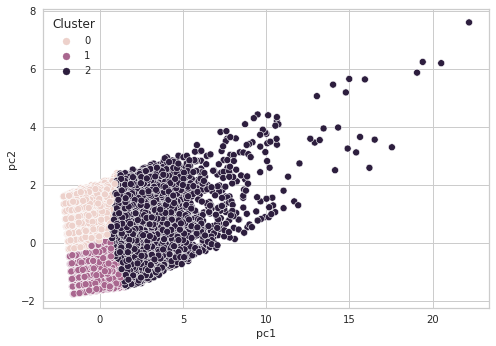

In [37]:
sns.scatterplot(x=profiling_df['pc1'],y=profiling_df['pc2'],hue=profiling_df['Cluster'])

In [89]:
profiling_df.iloc[:,0:]

,CUSTOMER_ID,ACQ_BOOKEDDATE,ACQ_TRIP_TYPE,ACQ_BOOKING_PLATFORM,ACQ_LENGTH_OF_STAY_CATEGORY,ACQ_BEDVALUE,ACQ_BOOKING_LEADTIME,LIFETIME_BEDVALUE,GROUP,Cluster,pc1,pc2
0,1,2018-11-22,Short Haul,DESKTOP,1-2 Nights,55.75044324664009,1-2 days,252.50249172284873,Short Haul/DESKTOP/1-2 Nights/,0,-1.3588097604947265,1.1450001337596145
1,2,2018-10-25,Domestic,DESKTOP,1-2 Nights,202.2050696907252,3-6 days,"5,315.6643445172485",Domestic/DESKTOP/1-2 Nights/,0,-1.0515883608427268,0.14364154825055322
2,3,2018-09-12,Domestic,MOBILE,1-2 Nights,132.69240022901124,Same day,"2,574.5143929325473",Domestic/MOBILE/1-2 Nights/,1,-1.185275885113319,-1.4531333289716692
3,4,2018-09-17,Long Haul,DESKTOP,1-2 Nights,636.7342747824262,31-60 days,313.3371706700617,Long Haul/DESKTOP/1-2 Nights/,1,0.9316843080268579,-0.9400594268645632
4,5,2018-11-01,Domestic,MOBILE,1-2 Nights,104.65420951330842,3-6 days,"1,511.8811431173308",Domestic/MOBILE/1-2 Nights/,0,-0.8350878127462293,0.407132933745096
...,...,...,...,...,...,...,...,...,...,...,...,...
105891,105892,2018-10-24,Short Haul,MOBILE,1-2 Nights,"2,557.4602686424087",7-30 days,"42,608.75090627116",Short Haul/MOBILE/1-2 Nights/,0,-0.08537134272042692,1.3573340734690227
105892,105893,2018-12-05,Long Haul,DESKTOP,3-4 Nights,727.3560311079199,60+ days,"4,506.487152916254",Long Haul/DESKTOP/3-4 Nights/,0,-0.029653425594949774,0.22156285309012977
105893,105894,2018-11-18,Long Haul,DESKTOP,3-4 Nights,98.0869857607039,7-30 days,"13,589.57410888492",Long Haul/DESKTOP/3-4 Nights/,1,-0.38508113488867934,-0.6218431831972735
105894,105895,2018-09-25,Domestic,MOBILE,1-2 Nights,878.4754445954371,1-2 days,"8,120.933119998758",Domestic/MOBILE/1-2 Nights/,2,1.2221105376438033,-0.3191104877689373


In [ ]:
columns = ['ACQ_TRIP_TYPE','ACQ_LENGTH_OF_STAY_CATEGORY','ACQ_BOOKING_LEADTIME','ACQ_BOOKING_PLATFORM_MOBILE']

for i in profiling_df['Cluster'].unique():
    viz_df = profiling_df[profiling_df['Cluster']==i]
    for column in columns:
        viz_df=profiling_df.groupby(['Cluster',column]).agg(LIFETIME_BEDVALUE_Sum=('LIFETIME_BEDVALUE', 'sum'),Customer_volume=('CUSTOMER_ID','count'))
        viz_df['LIFETIME_BEDVALUE_Sum']=round(viz_df['LIFETIME_BEDVALUE_Sum'],2)
        viz_df.reset_index(inplace=True)
        df_to_merge = profiling_df.groupby(['Cluster']).agg(Customer_volume_overall=('CUSTOMER_ID','count'))
        df_to_merge.reset_index(inplace=True)
        viz_df=viz_df.merge(df_to_merge, on ='Cluster')
        viz_df['Volume %']= round((viz_df['Customer_volume']/viz_df['Customer_volume_overall'])*100,2)
        viz_df.set_index(['Cluster',column], inplace=True)
        viz_df=viz_df[['LIFETIME_BEDVALUE_Sum','Customer_volume', 'Customer_volume_overall', 'Volume %']]
        display(viz_df)

In [178]:
test1=profiling_df.groupby(['Cluster','GROUP']).agg(LIFETIME_BEDVALUE_Sum=('LIFETIME_BEDVALUE', 'mean'),Customer_volume=('CUSTOMER_ID','count'))
test1.reset_index(inplace=True)

In [179]:
test2=profiling_df.groupby(['Cluster']).agg(LIFETIME_BEDVALUE_Sum_overall=('LIFETIME_BEDVALUE', 'mean'),Customer_volume_overall=('CUSTOMER_ID','count'))
test2.reset_index(inplace=True)

In [180]:
test1=test1.merge(test2, on ='Cluster')

In [181]:
test1['Volume %']= round((test1['Customer_volume']/test1['Customer_volume_overall'])*100,2)
test1['LIFETIME_BEDVALUE %']= round((test1['LIFETIME_BEDVALUE_Sum']/test1['LIFETIME_BEDVALUE_Sum_overall'])*100,2)
test1['LIFETIME_BEDVALUE_Sum']= round(test1['LIFETIME_BEDVALUE_Sum'],2)
#test1.set_index(['Cluster','GROUP'], inplace=True)
test1.drop(['LIFETIME_BEDVALUE_Sum_overall','Customer_volume_overall'],inplace=True,axis=1)

In [182]:
test1

,Cluster,GROUP,LIFETIME_BEDVALUE_Sum,Customer_volume,Volume %,LIFETIME_BEDVALUE %
0,0,Domestic/DESKTOP/1-2 Nights/,"4,470.23",3953,9.32,54.85
1,0,Domestic/DESKTOP/3-4 Nights/,"9,218.14",1160,2.74,113.1
2,0,Domestic/DESKTOP/5-6 Nights/,"10,080.2",280,0.66,123.68
3,0,Domestic/DESKTOP/7+ Nights/,"18,088.81",176,0.42,221.94
4,0,Domestic/MOBILE/1-2 Nights/,"4,176.38",5901,13.92,51.24
5,0,Domestic/MOBILE/3-4 Nights/,"8,147.56",1321,3.12,99.97
6,0,Domestic/MOBILE/5-6 Nights/,"11,717.28",273,0.64,143.77
7,0,Domestic/MOBILE/7+ Nights/,"14,090.4",182,0.43,172.88
8,0,Long Haul/DESKTOP/1-2 Nights/,"8,466.59",4376,10.32,103.88
9,0,Long Haul/DESKTOP/3-4 Nights/,"14,549.04",2537,5.98,178.51


In [167]:
test1=test1[test1['Cluster']==0].sort_values('Volume %',ascending=False)

In [168]:
test1[test1['Cluster']==0].iloc[:5]

,Cluster,GROUP,LIFETIME_BEDVALUE_Sum,Customer_volume,Volume %,LIFETIME_BEDVALUE %
16,0,Short Haul/DESKTOP/1-2 Nights/,"47,844,649.71",7059,16.65,13.84
4,0,Domestic/MOBILE/1-2 Nights/,"24,644,813.73",5901,13.92,7.13
20,0,Short Haul/MOBILE/1-2 Nights/,"28,094,893.33",5441,12.83,8.13
8,0,Long Haul/DESKTOP/1-2 Nights/,"37,049,806.68",4376,10.32,10.72
0,0,Domestic/DESKTOP/1-2 Nights/,"17,670,825.74",3953,9.32,5.11
